# 5.imageClassData

MNIST数据集 (LeCun et al., 1998) 是图像分类中广泛使用的数据集之一，但作为基准数据集过于简单。 我们将使用类似但更复杂的Fashion-MNIST数据集 (Xiao et al., 2017)。

In [1]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l
d2l.use_svg_display()

## 1.读取数据集
我们可以通过框架中的内置函数将Fashion-MNIST数据集下载并读取到内存中。

In [3]:
# 通过ToTensor实例将图像数据从PIL类型转为32位浮点数格式
# 并除以255使得所有像素的值均在0-1之间
trans=transforms.ToTensor()
mnist_train=torchvision.datasets.FashionMNIST(root="../data",train=True,transform=trans,download=True)
mnist_test=torchvision.datasets.FashionMNIST(root="../data",train=False,transform=trans,download=True)

Fashion-MNIST由10个类别的图像组成， 每个类别由训练数据集（train dataset）中的6000张图像 和测试数据集（test dataset）中的1000张图像组成。 因此，训练集和测试集分别包含60000和10000张图像。 测试数据集不会用于训练，只用于评估模型性能。


In [4]:
print(len(mnist_train),"\n",len(mnist_test))
print(mnist_train[0][0].shape)

60000 
 10000
torch.Size([1, 28, 28])


Fashion-MNIST中包含的10个类别，分别为t-shirt（T恤）、trouser（裤子）、pullover（套衫）、dress（连衣裙）、coat（外套）、sandal（凉鞋）、shirt（衬衫）、sneaker（运动鞋）、bag（包）和ankle boot（短靴）。 以下函数用于在数字标签索引及其文本名称之间进行转换。

In [5]:
def get_fashion_mnist_labels(labels):#@save
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels=['t-shirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']
    return [text_labels[int(i)] for i in labels]

In [6]:
# 现在可以创建一个函数来可视化样本
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

array([<AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'dress'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'trouser'}>,
       <AxesSubplot:title={'center':'t-shirt'}>], dtype=object)

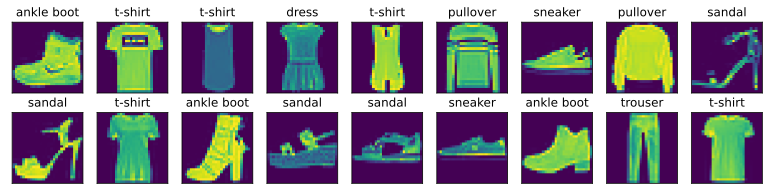

In [7]:
X,y=next(iter(data.DataLoader(mnist_train,batch_size=18)))
show_images(X.reshape(18,28,28),2,9,titles=get_fashion_mnist_labels(y))

## 2.读取小批量
为了使我们在读取训练集和测试集时更容易，我们使用内置的数据迭代器，而不是从零开始创建。 回顾一下，在每次迭代中，数据加载器每次都会读取一小批量数据，大小为batch_size。 通过内置数据迭代器，我们可以随机打乱了所有样本，从而无偏见地读取小批量。

In [8]:
batch_size=256
def get_dataloader_workers():
    """使用4个进程来读数据"""
    return 4
train_iter=data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=get_dataloader_workers())

In [9]:
# 看一下读取训练数据所需时间
timer=d2l.Timer()
for X,y in train_iter:
    continue
print(f'{timer.stop():.2f}sec')

3.44sec


## 3.整合所有组件
现在我们定义load_data_fashion_mnist函数，用于获取和读取Fashion-MNIST数据集。 这个函数返回训练集和验证集的数据迭代器。 此外，这个函数还接受一个可选参数resize，用来将图像大小调整为另一种形状。

In [10]:
def load_data_fashion_mnist(batch_size,resize=None):
    """下载Fashion-MNIST数据集，然后加载到内存中"""
    trans=[transforms.ToTensor()]
    if resize:
        trans.insert(0,transforms.Resize(resize))
    trans=transforms.Compose(trans)
    mnist_train=torchvision.datasets.FashionMNIST(root="../data",train=True,transform=trans,download=True)
    mnist_test=torchvision.datasets.FashionMNIST(root="../data",train=False,transform=trans,download=True)
    return (data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=get_dataloader_workers()),data.DataLoader(mnist_test,batch_size,shuffle=False,num_workers=get_dataloader_workers()))

In [15]:
train_iter,test_iter=load_data_fashion_mnist(32,resize=64)
for X,y in train_iter:
    print(X.shape,X.dtype,y.shape,y.dtype)
    break
for X,y in test_iter:
    print(X.shape,X.dtype,y.shape,y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64
torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


## 4.小结
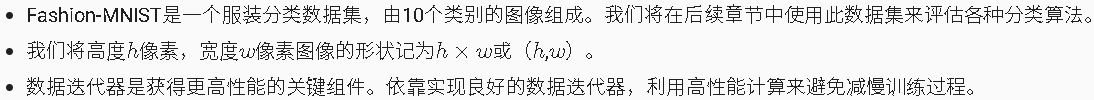

## 5.练习


### 5.1减少batch_size（如减少到1）是否会影响读取性能？

In [33]:

timer=d2l.Timer()
train_iter,test_iter=load_data_fashion_mnist(1,resize=64)
print(f'{timer.stop():.2f}sec')

timer=d2l.Timer()
train_iter,test_iter=load_data_fashion_mnist(128,resize=64)
print(f'{timer.stop():.2f}sec')

0.03sec
0.03sec


解：
较大的batch_size可以利用并行化操作来提高数据加载的效率。在读取数据时，可以同时加载多个样本到内存中，以减少磁盘读取数据的时间。而当batch_size减少到1时，无法利用并行化操作，每次只能加载一个样本，从而导致数据加载的效率降低。
此外，较小的batch_size也会带来更多的数据加载次数。数据加载在计算机中属于I/O操作，通常是相对较慢的。因此，较小的batch_size会导致更频繁的数据加载操作，增加了整体的读取时间。
然而，较小的batch_size也具有一些优点，比如更快的模型更新和更精确的梯度估计。因此，在选择batch_size时，需要综合考虑性能和模型训练的需求，权衡不同因素。

---

### 5.2数据迭代器的性能非常重要。当前的实现足够快吗？探索各种选择来改进它。

解：
1)使用pin_memory=True：在创建数据加载器时，设置pin_memory=True来将数据加载到GPU内存中，利用GPU的并行性来加快数据传输速度。
2)使用多个get_dataloader_workers：通过增加get_dataloader_workers参数的值，可以使用多个子进程或线程来并行读取数据，从而加快数据加载的速度。可以根据计算机的硬件配置和数据加载的需求，选择合适的get_dataloader_workers值。

In [30]:
def load_data_fashion_mnist(batch_size,resize=None):
    """下载Fashion-MNIST数据集，然后加载到内存中"""
    trans=[transforms.ToTensor()]
    if resize:
        trans.insert(0,transforms.Resize(resize))
    trans=transforms.Compose(trans)
    mnist_train=torchvision.datasets.FashionMNIST(root="../data",train=True,transform=trans,download=True)
    mnist_test=torchvision.datasets.FashionMNIST(root="../data",train=False,transform=trans,download=True)
    return (data.DataLoader(mnist_train,batch_size,shuffle=True,pin_memory=True,num_workers=get_dataloader_workers()),data.DataLoader(mnist_test,batch_size,shuffle=False,pin_memory=True,num_workers=get_dataloader_workers()))
timer=d2l.Timer()
train_iter,test_iter=load_data_fashion_mnist(1,resize=64)
print(f'{timer.stop():.2f}sec')

0.03sec


---


In [32]:
# 查阅框架的在线API文档。还有哪些其他数据集可用？
dir(torchvision.datasets)

['CIFAR10',
 'CIFAR100',
 'CLEVRClassification',
 'CREStereo',
 'Caltech101',
 'Caltech256',
 'CarlaStereo',
 'CelebA',
 'Cityscapes',
 'CocoCaptions',
 'CocoDetection',
 'Country211',
 'DTD',
 'DatasetFolder',
 'EMNIST',
 'ETH3DStereo',
 'EuroSAT',
 'FER2013',
 'FGVCAircraft',
 'FakeData',
 'FallingThingsStereo',
 'FashionMNIST',
 'Flickr30k',
 'Flickr8k',
 'Flowers102',
 'FlyingChairs',
 'FlyingThings3D',
 'Food101',
 'GTSRB',
 'HD1K',
 'HMDB51',
 'INaturalist',
 'ImageFolder',
 'ImageNet',
 'Imagenette',
 'InStereo2k',
 'KMNIST',
 'Kinetics',
 'Kitti',
 'Kitti2012Stereo',
 'Kitti2015Stereo',
 'KittiFlow',
 'LFWPairs',
 'LFWPeople',
 'LSUN',
 'LSUNClass',
 'MNIST',
 'Middlebury2014Stereo',
 'MovingMNIST',
 'Omniglot',
 'OxfordIIITPet',
 'PCAM',
 'PhotoTour',
 'Places365',
 'QMNIST',
 'RenderedSST2',
 'SBDataset',
 'SBU',
 'SEMEION',
 'STL10',
 'SUN397',
 'SVHN',
 'SceneFlowStereo',
 'Sintel',
 'SintelStereo',
 'StanfordCars',
 'UCF101',
 'USPS',
 'VOCDetection',
 'VOCSegmentation',
 